<a href="https://colab.research.google.com/github/LadyBug002/RecommendationSystem/blob/main/movie_recomandacor_using_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os
import re
import numpy as np
import pandas as pd

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
!pip3 install sentencepiece
import sentencepiece

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [ ]:
def embed(texts):
  return model(texts)

In [ ]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549277,  0.02886906, -0.02628894,  0.04502157, -0.01233333,
         0.02568332, -0.00071879, -0.05447305,  0.04221926, -0.01913711,
         0.02710008, -0.04328043, -0.02486855,  0.01359515,  0.00482791,
        -0.05379638,  0.01630705,  0.02139905,  0.02644023, -0.02320255,
         0.06569219, -0.10137626, -0.01691998,  0.02492484,  0.02406812,
        -0.03139619, -0.03265483, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868442,  0.0438069 , -0.02071747, -0.01873295, -0.03071437,
         0.01825577,  0.03627163,  0.01321464,  0.00943491, -0.03006621,
         0.06655684,  0.01529935, -0.10101432, -0.0067194 , -0.01578644,
         0.04991003,  0.02548564,  0.05454977, -0.0165857 ,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997451,
         0.04206816, -0.04119829, -0.00768589, -0.05101155,  0.01210043,
        -0.0167321 , -0.01382076,  0.00373708,  0.04911596, -0.03481683,
 

In [ ]:
df = pd.read_csv("Top_10000_Movies.csv", engine = "python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [ ]:
df = df[["original_title", "overview", "genre", "popularity", "vote_average"]]
df.head()

,original_title,overview,genre,popularity,vote_average
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...,"['Science Fiction', 'Action', 'Adventure']",5401.308,6.8
1,Eternals,The Eternals are a team of ancient aliens who ...,"['Action', 'Adventure', 'Science Fiction', 'Fa...",3365.535,7.1
2,Dune,"Paul Atreides, a brilliant and gifted young ma...","['Action', 'Adventure', 'Science Fiction']",2911.423,8.0
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...,"['Action', 'Crime', 'Thriller']",2552.437,6.9
4,Free Guy,A bank teller called Guy realizes he is a back...,"['Comedy', 'Action', 'Adventure', 'Science Fic...",1850.470,7.8


In [ ]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [ ]:
titles = list(df['overview'])

In [ ]:
titles[:10]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.',
 "Paul Atreides, a brilliant and gifted young man born into a great destiny beyond his understanding, must travel to the most dangerous planet in the universe to ensure the future of his family and his people. As malevolent forces explode into conflict over the planet's exclusive supply of the most precious resource in existence-a commodity capable of unlocking humanity's greatest potential-only those who can conquer their fear will survive.",
 'A mysterious woman recruits bank teller Ludwig Dieter to lead a group of aspiring thieves on a top-secret heist during the early stages 

In [ ]:
embeddings = embed(titles)
print('the embedding shapes is: ', embeddings.shape)

the embedding shapes is:  (5500, 512)


In [ ]:
pca = PCA(n_components=5)
emb_2d = pca.fit_transform(embeddings)

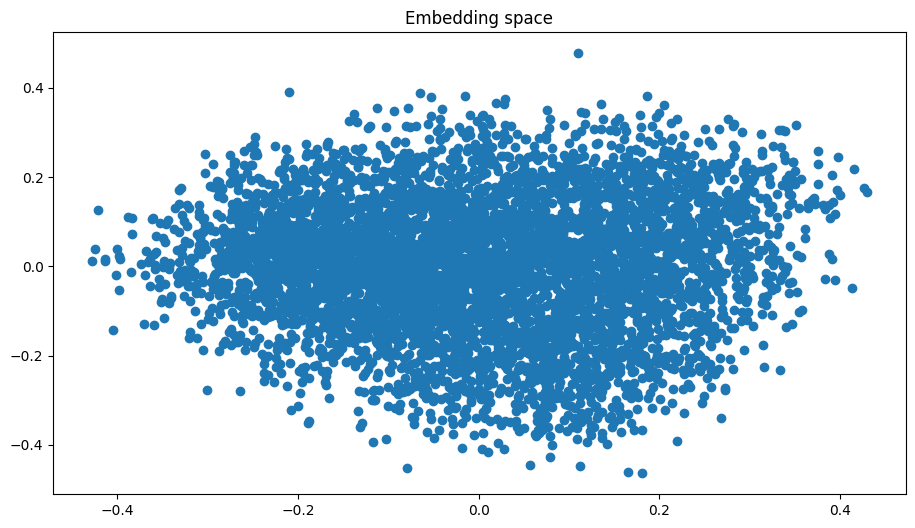

In [ ]:
plt.figure(figsize=(11,6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors = 15)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=15)

In [ ]:
NearestNeighbors(n_neighbors = 15)

NearestNeighbors(n_neighbors=15)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    recommended_movies = df.iloc[neighbors]
    recommended_movies = recommended_movies.sort_values(by=["popularity", "vote_average"], ascending=False)
    top_movie = recommended_movies.iloc[0]
    return recommended_movies[["original_title", "popularity", "vote_average"]].values.tolist()


In [ ]:
# Test the recommendation system
print('Recommended Movies:')
# enter the input here:
recommendations = recommend('i dont like robbery but i like thriller')
for movie in recommendations:
    print(f'Title: {movie[0]},\t \t Popularity: {movie[1]}, \t \t Vote Average: {movie[2]}')


Recommended Movies:
Title: The Harder They Fall,	 	 Popularity: 264.246, 	 	 Vote Average: 6.6
Title: The Batman,	 	 Popularity: 41.519, 	 	 Vote Average: 0.0
Title: Free Fire,	 	 Popularity: 30.689, 	 	 Vote Average: 6.3
Title: Speed,	 	 Popularity: 30.605, 	 	 Vote Average: 7.1
Title: La Proie,	 	 Popularity: 29.404, 	 	 Vote Average: 6.4
Title: Precious Cargo,	 	 Popularity: 24.909, 	 	 Vote Average: 5.2
Title: Lucky Number Slevin,	 	 Popularity: 21.266, 	 	 Vote Average: 7.5
Title: Get Rich or Die Tryin',	 	 Popularity: 20.807, 	 	 Vote Average: 6.7
Title: Bastille Day,	 	 Popularity: 20.732, 	 	 Vote Average: 6.3
Title: 악인전,	 	 Popularity: 20.396, 	 	 Vote Average: 7.5
Title: War,	 	 Popularity: 19.168, 	 	 Vote Average: 6.3
Title: Lost Highway,	 	 Popularity: 17.534, 	 	 Vote Average: 7.6
Title: ルパン三世VS名探偵コナン THE MOVIE,	 	 Popularity: 15.29, 	 	 Vote Average: 6.8
Title: King of Thieves,	 	 Popularity: 15.071, 	 	 Vote Average: 5.4
Title: Tango & Cash,	 	 Popularity: 14.068, 	 	 V